In [ ]:
#![LaSPACE_logo.jpg](attachment:LaSPACE_logo.jpg)

# MAVEN - SEP



# Making NASA’s Open-Innovation Data More Machine-Learning Friendly: A Case for the MAVEN Datasets

## LURA Project 2020-2021


LURA Project Title: "Making NASA's Open-Innovation Data More Machine-Learning Friendly: A Case for the MAVEN Datasets" <br> This research grant was awarded by the Louisiana Space Grant Consortium (LaSPACE). URL: https://laspace.lsu.edu/about-us/. <br> LaSPACE Grant Number: ##---TBA---##, Primary NASA Grant Number: 80NSSC20M0110.


Project P.I.: Dr. Dhan Lord B. Fortela <br> Apprentice Student: Ashton C. Fremin <br> Department of Chemical Engineering, University of Louisiana at Lafayette, URL: https://chemical.louisiana.edu/


Recent Notebook Revision: 23 June 2021


## Notebook Overview:

This Jupyter Notebook is running Python shows that step-by-step workflow from the download to the analysis of the MAVEN datasets.

The PyDIVIDE package is used to download the MAVEN datasets and to perform som graphical analysis of the data. It was created by the MAVEN Team at the University of Colorado - Boulder: https://github.com/MAVENSDC/Pydivide. It is main used in this project to download and read the datasets.

The Self-Organizing Map (SOM) package is available from this GitHub repository: https://github.com/sevamoo/SOMPY.git.

## Install the PyDIVIDE package:

In [ ]:
pip install pydivide # no need to run if pydivide is already installed, just import (next line)

## Import the Python Packages:

In [1]:
import sompy
import pydivide 
import matplotlib.pylab as plt
from matplotlib import pyplot
import matplotlib
%matplotlib inline
import pandas as pd
import numpy as np
from time import time
import random
import glob

/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


## Download MAVEM Data from NASA Datacenter:

Download the target MAVEN dataset into the local directory. This may take minutes depending on the netwrok speed.

After running the code line below, you do not have to run it again; unless you are downloading from another time period.


The download function allows for the specification of destination folder using the 'local_dir=path' argument.

In [ ]:
pydivide.download_files(start_date='2018-06-01',
                              end_date='2018-06-30',
                              local_dir='...type the file path here',
                              insitu=True,
                               iuvs=True)

## Extract the raw data to working dataset


Reading the downloaded datset. The 'pydivide.read' function reads the data from the local folder specified above.

In [2]:
insitu= pydivide.read(['2018-05-15', '2018-06-29'],insitu_only=True)

In [3]:
type(insitu)

collections.OrderedDict

Check the Keys of the data array. These Keys pertain to the instruments and other aspects of the MAVEN spacecraft like the position (Orbit, SPACECRAFT) and time stamps.

In [4]:
insitu.keys()

odict_keys(['TimeString', 'Time', 'Orbit', 'IOflag', 'LPW', 'EUV', 'SWEA', 'SWIA', 'STATIC', 'SEP', 'MAG', 'NGIMS', 'MODELED_MAG', 'APP', 'SPACECRAFT'])

### We will focus on the LPW subset of the data:

In [5]:
insitu_SEP = insitu.get("SEP")
insitu_SEP.head()


,ION_ENERGY_FLUX__FOV_1_F,ION_ENERGY_FLUX__FOV_1_F_QUAL,ION_ENERGY_FLUX__FOV_1_R,ION_ENERGY_FLUX__FOV_1_R_QUAL,ION_ENERGY_FLUX__FOV_2_F,ION_ENERGY_FLUX__FOV_2_F_QUAL,ION_ENERGY_FLUX__FOV_2_R,ION_ENERGY_FLUX__FOV_2_R_QUAL,ELECTRON_ENERGY_FLUX___FOV_1_F,ELECTRON_ENERGY_FLUX___FOV_1_F_QUAL,...,LOOK_DIRECTION_1_F_MSO_Z,LOOK_DIRECTION_1_R_MSO_X,LOOK_DIRECTION_1_R_MSO_Y,LOOK_DIRECTION_1_R_MSO_Z,LOOK_DIRECTION_2_F_MSO_X,LOOK_DIRECTION_2_F_MSO_Y,LOOK_DIRECTION_2_F_MSO_Z,LOOK_DIRECTION_2_R_MSO_X,LOOK_DIRECTION_2_R_MSO_Y,LOOK_DIRECTION_2_R_MSO_Z
2018-05-15T00:00:00,NaN,NaN,NaN,NaN,7.86,5.20,6.02,5.20,NaN,NaN,...,0.625,-0.707,-0.331,-0.625,0.707,-0.332,-0.625,-0.707,0.332,0.625
2018-05-15T00:00:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.625,-0.707,-0.331,-0.625,0.707,-0.332,-0.625,-0.707,0.332,0.625
2018-05-15T00:00:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.625,-0.707,-0.331,-0.625,0.707,-0.332,-0.625,-0.707,0.332,0.625
2018-05-15T00:00:24,17.6,5.82,4.63,5.82,NaN,NaN,NaN,NaN,2.55,3.65,...,0.625,-0.707,-0.331,-0.625,0.707,-0.332,-0.625,-0.707,0.332,0.625
2018-05-15T00:00:32,11.1,5.41,3.48,5.41,12.70,5.52,3.94,5.52,3.47,3.74,...,0.625,-0.707,-0.331,-0.625,0.707,-0.332,-0.625,-0.707,0.332,0.625


Check the number of data:

In [6]:
insitu_SEP.count()

ION_ENERGY_FLUX__FOV_1_F               527210
ION_ENERGY_FLUX__FOV_1_F_QUAL          527210
ION_ENERGY_FLUX__FOV_1_R               527210
ION_ENERGY_FLUX__FOV_1_R_QUAL          527210
ION_ENERGY_FLUX__FOV_2_F               527051
ION_ENERGY_FLUX__FOV_2_F_QUAL          527051
ION_ENERGY_FLUX__FOV_2_R               527051
ION_ENERGY_FLUX__FOV_2_R_QUAL          527051
ELECTRON_ENERGY_FLUX___FOV_1_F         527210
ELECTRON_ENERGY_FLUX___FOV_1_F_QUAL    527210
ELECTRON_ENERGY_FLUX___FOV_1_R         527210
ELECTRON_ENERGY_FLUX___FOV_1_R_QUAL    527210
ELECTRON_ENERGY_FLUX___FOV_2_F         527051
ELECTRON_ENERGY_FLUX___FOV_2_F_QUAL    527051
ELECTRON_ENERGY_FLUX___FOV_2_R         527051
ELECTRON_ENERGY_FLUX___FOV_2_R_QUAL    527051
LOOK_DIRECTION_1_F_MSO_X               527527
LOOK_DIRECTION_1_F_MSO_Y               527527
LOOK_DIRECTION_1_F_MSO_Z               527527
LOOK_DIRECTION_1_R_MSO_X               527527
LOOK_DIRECTION_1_R_MSO_Y               527527
LOOK_DIRECTION_1_R_MSO_Z          

Remove the last column as it has no data:

In [6]:
#insitu_SWEA= insitu_SWEA.iloc[: , 0:-1]

In [7]:
#insitu_SWEA.head()

,SOLAR_WIND_ELECTRON_DENSITY,SOLAR_WIND_ELECTRON_DENSITY_QUAL,SOLAR_WIND_ELECTRON_TEMPERATURE,SOLAR_WIND_ELECTRON_TEMPERATURE_QUAL,ELECTRON_PARALLEL_FLUX_LOW,Electron eflux Parallel (5-100 ev) Quality,ELECTRON_PARALLEL_FLUX_MID,Electron eflux Parallel (100-500 ev) Quality,ELECTRON_PARALLEL_FLUX_HIGH,Electron eflux Parallel (500-1000 ev) Quality,ELECTRON_ANTI_PARALLEL_FLUX_LOW,Electron eflux Anti-par (5-100 ev) Quality,ELECTRON_ANTI_PARALLEL_FLUX_MID,Electron eflux Anti-par (100-500 ev) Quality,ELECTRON_ANTI_PARALLEL_FLUX_HIGH,Electron eflux Anti-par (500-1000 ev) Quality,ELECTRON_SPECTRUM_SHAPE_PARAMETER
2018-05-15T00:00:00,7.53,0.000002,27.5,0.000012,67700000.0,468000.0,19100000.0,342000.0,75800.0,31700.0,67600000.0,448000.0,23400000.0,363000.0,55100.0,25000.0,4.397
2018-05-15T00:00:08,8.97,0.000002,28.4,0.000011,76000000.0,513000.0,36800000.0,501000.0,130000.0,42600.0,83800000.0,546000.0,27000000.0,419000.0,41900.0,22200.0,4.399
2018-05-15T00:00:16,6.40,0.000002,27.0,0.000012,61600000.0,434000.0,17900000.0,324000.0,NaN,NaN,60100000.0,427000.0,14600000.0,290000.0,82100.0,33500.0,4.392
2018-05-15T00:00:24,3.86,0.000001,25.9,0.000013,43300000.0,371000.0,6330000.0,194000.0,50900.0,26600.0,40400000.0,333000.0,11200000.0,245000.0,87800.0,32700.0,4.521
2018-05-15T00:00:32,5.98,0.000002,24.7,0.000010,53200000.0,423000.0,13300000.0,294000.0,64500.0,29100.0,47500000.0,363000.0,15500000.0,286000.0,41700.0,20800.0,4.390


Remove observations with missing entries:

In [7]:
insitu_SEP.isnull().sum()

ION_ENERGY_FLUX__FOV_1_F               362
ION_ENERGY_FLUX__FOV_1_F_QUAL          362
ION_ENERGY_FLUX__FOV_1_R               362
ION_ENERGY_FLUX__FOV_1_R_QUAL          362
ION_ENERGY_FLUX__FOV_2_F               521
ION_ENERGY_FLUX__FOV_2_F_QUAL          521
ION_ENERGY_FLUX__FOV_2_R               521
ION_ENERGY_FLUX__FOV_2_R_QUAL          521
ELECTRON_ENERGY_FLUX___FOV_1_F         362
ELECTRON_ENERGY_FLUX___FOV_1_F_QUAL    362
ELECTRON_ENERGY_FLUX___FOV_1_R         362
ELECTRON_ENERGY_FLUX___FOV_1_R_QUAL    362
ELECTRON_ENERGY_FLUX___FOV_2_F         521
ELECTRON_ENERGY_FLUX___FOV_2_F_QUAL    521
ELECTRON_ENERGY_FLUX___FOV_2_R         521
ELECTRON_ENERGY_FLUX___FOV_2_R_QUAL    521
LOOK_DIRECTION_1_F_MSO_X                45
LOOK_DIRECTION_1_F_MSO_Y                45
LOOK_DIRECTION_1_F_MSO_Z                45
LOOK_DIRECTION_1_R_MSO_X                45
LOOK_DIRECTION_1_R_MSO_Y                45
LOOK_DIRECTION_1_R_MSO_Z                45
LOOK_DIRECTION_2_F_MSO_X                45
LOOK_DIRECT

In [8]:
#insitu_LPW_clean = insitu_LPW.dropna()

# Just save the LLPW data w/o droppping any null entry for now
#insitu_SEP_clean=insitu_SEP

#insitu_SEP_clean = insitu_SEP.drop([ 
#    'EWAVE_LOW_FREQ',
#    'EWAVE_LOW_FREQ_QUAL_QUAL', 
#    'EWAVE_MID_FREQ',
#    'EWAVE_MID_FREQ_QUAL_QUAL', 
#    'EWAVE_HIGH_FREQ',
#    'EWAVE_HIGH_FREQ_QUAL_QUAL'], 
#                                                  axis='columns', 
#                                                  inplace=False)


insitu_SEP_clean = insitu_SEP.dropna()

In [9]:
insitu_SEP_clean.count()

ION_ENERGY_FLUX__FOV_1_F               526835
ION_ENERGY_FLUX__FOV_1_F_QUAL          526835
ION_ENERGY_FLUX__FOV_1_R               526835
ION_ENERGY_FLUX__FOV_1_R_QUAL          526835
ION_ENERGY_FLUX__FOV_2_F               526835
ION_ENERGY_FLUX__FOV_2_F_QUAL          526835
ION_ENERGY_FLUX__FOV_2_R               526835
ION_ENERGY_FLUX__FOV_2_R_QUAL          526835
ELECTRON_ENERGY_FLUX___FOV_1_F         526835
ELECTRON_ENERGY_FLUX___FOV_1_F_QUAL    526835
ELECTRON_ENERGY_FLUX___FOV_1_R         526835
ELECTRON_ENERGY_FLUX___FOV_1_R_QUAL    526835
ELECTRON_ENERGY_FLUX___FOV_2_F         526835
ELECTRON_ENERGY_FLUX___FOV_2_F_QUAL    526835
ELECTRON_ENERGY_FLUX___FOV_2_R         526835
ELECTRON_ENERGY_FLUX___FOV_2_R_QUAL    526835
LOOK_DIRECTION_1_F_MSO_X               526835
LOOK_DIRECTION_1_F_MSO_Y               526835
LOOK_DIRECTION_1_F_MSO_Z               526835
LOOK_DIRECTION_1_R_MSO_X               526835
LOOK_DIRECTION_1_R_MSO_Y               526835
LOOK_DIRECTION_1_R_MSO_Z          

In [10]:
insitu_SEP_clean.head()

,ION_ENERGY_FLUX__FOV_1_F,ION_ENERGY_FLUX__FOV_1_F_QUAL,ION_ENERGY_FLUX__FOV_1_R,ION_ENERGY_FLUX__FOV_1_R_QUAL,ION_ENERGY_FLUX__FOV_2_F,ION_ENERGY_FLUX__FOV_2_F_QUAL,ION_ENERGY_FLUX__FOV_2_R,ION_ENERGY_FLUX__FOV_2_R_QUAL,ELECTRON_ENERGY_FLUX___FOV_1_F,ELECTRON_ENERGY_FLUX___FOV_1_F_QUAL,...,LOOK_DIRECTION_1_F_MSO_Z,LOOK_DIRECTION_1_R_MSO_X,LOOK_DIRECTION_1_R_MSO_Y,LOOK_DIRECTION_1_R_MSO_Z,LOOK_DIRECTION_2_F_MSO_X,LOOK_DIRECTION_2_F_MSO_Y,LOOK_DIRECTION_2_F_MSO_Z,LOOK_DIRECTION_2_R_MSO_X,LOOK_DIRECTION_2_R_MSO_Y,LOOK_DIRECTION_2_R_MSO_Z
2018-05-15T00:00:32,11.10,5.41,3.48,5.41,12.70,5.52,3.94,5.52,3.47,3.74,...,0.625,-0.707,-0.331,-0.625,0.707,-0.332,-0.625,-0.707,0.332,0.625
2018-05-15T00:00:40,9.48,5.31,5.55,5.31,10.20,5.36,6.47,5.36,4.63,3.85,...,0.625,-0.707,-0.331,-0.625,0.707,-0.332,-0.625,-0.707,0.332,0.625
2018-05-15T00:00:48,5.80,5.06,5.56,5.06,7.42,5.17,6.03,5.17,5.32,3.91,...,0.625,-0.707,-0.331,-0.625,0.707,-0.332,-0.625,-0.707,0.332,0.625
2018-05-15T00:00:56,5.78,5.06,5.78,5.06,6.71,5.12,6.71,5.12,6.02,3.97,...,0.625,-0.707,-0.331,-0.625,0.707,-0.332,-0.625,-0.707,0.332,0.625
2018-05-15T00:01:04,5.10,5.01,6.25,5.01,8.79,5.26,7.64,5.26,3.02,3.69,...,0.625,-0.707,-0.331,-0.625,0.707,-0.332,-0.625,-0.707,0.332,0.625


Saving the extracted LPW data as '.xlsx. file for other use:

In [11]:
insitu_SEP_clean.to_excel('Data_SEP.xlsx')

## Import the MAVEN Data:

Trying the MAVEN data. We will import the saved spreadsheet file. Make sure to check the columns in the file and remove the time-date column before using the dataset for SOM training.


In [12]:
#-- Uncomment the line below if using the dataframe just created above
#MAVEN_data = insitu_SWEA_clean
#
#
#-- Uncomment the line below if loading the saved spreadsheet from local directory
MAVEN_SEP_data_timeSeries = pd.read_excel('/Users/dhan-lordfortela/Documents/EIL/Proposals/LURA 2020/LURA 2020 - Grant Awarded/LURA_2020 - Working/FINAL_works/on_MAVEN_data/Data_SEP.xlsx')


Examine the structure of the data:

In [13]:
MAVEN_SEP_data_timeSeries.head()

,Unnamed: 0,ION_ENERGY_FLUX__FOV_1_F,ION_ENERGY_FLUX__FOV_1_F_QUAL,ION_ENERGY_FLUX__FOV_1_R,ION_ENERGY_FLUX__FOV_1_R_QUAL,ION_ENERGY_FLUX__FOV_2_F,ION_ENERGY_FLUX__FOV_2_F_QUAL,ION_ENERGY_FLUX__FOV_2_R,ION_ENERGY_FLUX__FOV_2_R_QUAL,ELECTRON_ENERGY_FLUX___FOV_1_F,...,LOOK_DIRECTION_1_F_MSO_Z,LOOK_DIRECTION_1_R_MSO_X,LOOK_DIRECTION_1_R_MSO_Y,LOOK_DIRECTION_1_R_MSO_Z,LOOK_DIRECTION_2_F_MSO_X,LOOK_DIRECTION_2_F_MSO_Y,LOOK_DIRECTION_2_F_MSO_Z,LOOK_DIRECTION_2_R_MSO_X,LOOK_DIRECTION_2_R_MSO_Y,LOOK_DIRECTION_2_R_MSO_Z
0,2018-05-15T00:00:32,11.10,5.41,3.48,5.41,12.70,5.52,3.94,5.52,3.47,...,0.625,-0.707,-0.331,-0.625,0.707,-0.332,-0.625,-0.707,0.332,0.625
1,2018-05-15T00:00:40,9.48,5.31,5.55,5.31,10.20,5.36,6.47,5.36,4.63,...,0.625,-0.707,-0.331,-0.625,0.707,-0.332,-0.625,-0.707,0.332,0.625
2,2018-05-15T00:00:48,5.80,5.06,5.56,5.06,7.42,5.17,6.03,5.17,5.32,...,0.625,-0.707,-0.331,-0.625,0.707,-0.332,-0.625,-0.707,0.332,0.625
3,2018-05-15T00:00:56,5.78,5.06,5.78,5.06,6.71,5.12,6.71,5.12,6.02,...,0.625,-0.707,-0.331,-0.625,0.707,-0.332,-0.625,-0.707,0.332,0.625
4,2018-05-15T00:01:04,5.10,5.01,6.25,5.01,8.79,5.26,7.64,5.26,3.02,...,0.625,-0.707,-0.331,-0.625,0.707,-0.332,-0.625,-0.707,0.332,0.625


In [14]:
MAVEN_SEP_data_timeSeries.count()

Unnamed: 0                             526835
ION_ENERGY_FLUX__FOV_1_F               526835
ION_ENERGY_FLUX__FOV_1_F_QUAL          526835
ION_ENERGY_FLUX__FOV_1_R               526835
ION_ENERGY_FLUX__FOV_1_R_QUAL          526835
ION_ENERGY_FLUX__FOV_2_F               526835
ION_ENERGY_FLUX__FOV_2_F_QUAL          526835
ION_ENERGY_FLUX__FOV_2_R               526835
ION_ENERGY_FLUX__FOV_2_R_QUAL          526835
ELECTRON_ENERGY_FLUX___FOV_1_F         526835
ELECTRON_ENERGY_FLUX___FOV_1_F_QUAL    526835
ELECTRON_ENERGY_FLUX___FOV_1_R         526835
ELECTRON_ENERGY_FLUX___FOV_1_R_QUAL    526835
ELECTRON_ENERGY_FLUX___FOV_2_F         526835
ELECTRON_ENERGY_FLUX___FOV_2_F_QUAL    526835
ELECTRON_ENERGY_FLUX___FOV_2_R         526835
ELECTRON_ENERGY_FLUX___FOV_2_R_QUAL    526835
LOOK_DIRECTION_1_F_MSO_X               526835
LOOK_DIRECTION_1_F_MSO_Y               526835
LOOK_DIRECTION_1_F_MSO_Z               526835
LOOK_DIRECTION_1_R_MSO_X               526835
LOOK_DIRECTION_1_R_MSO_Y          

Remove the time-date column (first column).

In [15]:
## check the column names and remove the qualitative variables
## drop also the date-time 'Unnamed:0'
MAVEN_data_timeSeries=MAVEN_SEP_data_timeSeries
MAVEN_data_timeSeries.columns

Index(['Unnamed: 0', 'ION_ENERGY_FLUX__FOV_1_F',
       'ION_ENERGY_FLUX__FOV_1_F_QUAL', 'ION_ENERGY_FLUX__FOV_1_R',
       'ION_ENERGY_FLUX__FOV_1_R_QUAL', 'ION_ENERGY_FLUX__FOV_2_F',
       'ION_ENERGY_FLUX__FOV_2_F_QUAL', 'ION_ENERGY_FLUX__FOV_2_R',
       'ION_ENERGY_FLUX__FOV_2_R_QUAL', 'ELECTRON_ENERGY_FLUX___FOV_1_F',
       'ELECTRON_ENERGY_FLUX___FOV_1_F_QUAL', 'ELECTRON_ENERGY_FLUX___FOV_1_R',
       'ELECTRON_ENERGY_FLUX___FOV_1_R_QUAL', 'ELECTRON_ENERGY_FLUX___FOV_2_F',
       'ELECTRON_ENERGY_FLUX___FOV_2_F_QUAL', 'ELECTRON_ENERGY_FLUX___FOV_2_R',
       'ELECTRON_ENERGY_FLUX___FOV_2_R_QUAL', 'LOOK_DIRECTION_1_F_MSO_X',
       'LOOK_DIRECTION_1_F_MSO_Y', 'LOOK_DIRECTION_1_F_MSO_Z',
       'LOOK_DIRECTION_1_R_MSO_X', 'LOOK_DIRECTION_1_R_MSO_Y',
       'LOOK_DIRECTION_1_R_MSO_Z', 'LOOK_DIRECTION_2_F_MSO_X',
       'LOOK_DIRECTION_2_F_MSO_Y', 'LOOK_DIRECTION_2_F_MSO_Z',
       'LOOK_DIRECTION_2_R_MSO_X', 'LOOK_DIRECTION_2_R_MSO_Y',
       'LOOK_DIRECTION_2_R_MSO_Z'],
      dt

In [18]:
insitu_SEP_clean_noQUAL = MAVEN_data_timeSeries.drop([
    'Unnamed: 0', 
       'ION_ENERGY_FLUX__FOV_1_F_QUAL', 
       'ION_ENERGY_FLUX__FOV_1_R_QUAL', 
       'ION_ENERGY_FLUX__FOV_2_F_QUAL', 
       'ION_ENERGY_FLUX__FOV_2_R_QUAL', 
       'ELECTRON_ENERGY_FLUX___FOV_1_F_QUAL', 
       'ELECTRON_ENERGY_FLUX___FOV_1_R_QUAL', 
       'ELECTRON_ENERGY_FLUX___FOV_2_F_QUAL', 
       'ELECTRON_ENERGY_FLUX___FOV_2_R_QUAL'], 
                                                  axis='columns', 
                                                  inplace=False)

In [19]:
insitu_SEP_clean_noQUAL.head()

,ION_ENERGY_FLUX__FOV_1_F,ION_ENERGY_FLUX__FOV_1_R,ION_ENERGY_FLUX__FOV_2_F,ION_ENERGY_FLUX__FOV_2_R,ELECTRON_ENERGY_FLUX___FOV_1_F,ELECTRON_ENERGY_FLUX___FOV_1_R,ELECTRON_ENERGY_FLUX___FOV_2_F,ELECTRON_ENERGY_FLUX___FOV_2_R,LOOK_DIRECTION_1_F_MSO_X,LOOK_DIRECTION_1_F_MSO_Y,LOOK_DIRECTION_1_F_MSO_Z,LOOK_DIRECTION_1_R_MSO_X,LOOK_DIRECTION_1_R_MSO_Y,LOOK_DIRECTION_1_R_MSO_Z,LOOK_DIRECTION_2_F_MSO_X,LOOK_DIRECTION_2_F_MSO_Y,LOOK_DIRECTION_2_F_MSO_Z,LOOK_DIRECTION_2_R_MSO_X,LOOK_DIRECTION_2_R_MSO_Y,LOOK_DIRECTION_2_R_MSO_Z
0,11.10,3.48,12.70,3.94,3.47,4.87,3.71,6.95,0.707,0.331,0.625,-0.707,-0.331,-0.625,0.707,-0.332,-0.625,-0.707,0.332,0.625
1,9.48,5.55,10.20,6.47,4.63,6.01,1.86,7.17,0.707,0.331,0.625,-0.707,-0.331,-0.625,0.707,-0.332,-0.625,-0.707,0.332,0.625
2,5.80,5.56,7.42,6.03,5.32,5.10,4.16,6.72,0.707,0.331,0.625,-0.707,-0.331,-0.625,0.707,-0.332,-0.625,-0.707,0.332,0.625
3,5.78,5.78,6.71,6.71,6.02,5.55,4.63,6.25,0.707,0.331,0.625,-0.707,-0.331,-0.625,0.707,-0.332,-0.625,-0.707,0.332,0.625
4,5.10,6.25,8.79,7.64,3.02,6.71,4.17,5.33,0.707,0.331,0.625,-0.707,-0.331,-0.625,0.707,-0.332,-0.625,-0.707,0.332,0.625


Make sure the data types are correct. All of the SWEA variables (after removing the date-time) should be 'float64' data type.

In [20]:
MAVEN_data=insitu_SEP_clean_noQUAL
MAVEN_data.dtypes

ION_ENERGY_FLUX__FOV_1_F          float64
ION_ENERGY_FLUX__FOV_1_R          float64
ION_ENERGY_FLUX__FOV_2_F          float64
ION_ENERGY_FLUX__FOV_2_R          float64
ELECTRON_ENERGY_FLUX___FOV_1_F    float64
ELECTRON_ENERGY_FLUX___FOV_1_R    float64
ELECTRON_ENERGY_FLUX___FOV_2_F    float64
ELECTRON_ENERGY_FLUX___FOV_2_R    float64
LOOK_DIRECTION_1_F_MSO_X          float64
LOOK_DIRECTION_1_F_MSO_Y          float64
LOOK_DIRECTION_1_F_MSO_Z          float64
LOOK_DIRECTION_1_R_MSO_X          float64
LOOK_DIRECTION_1_R_MSO_Y          float64
LOOK_DIRECTION_1_R_MSO_Z          float64
LOOK_DIRECTION_2_F_MSO_X          float64
LOOK_DIRECTION_2_F_MSO_Y          float64
LOOK_DIRECTION_2_F_MSO_Z          float64
LOOK_DIRECTION_2_R_MSO_X          float64
LOOK_DIRECTION_2_R_MSO_Y          float64
LOOK_DIRECTION_2_R_MSO_Z          float64
dtype: object

In [21]:
MAVEN_data.astype('float64').dtypes

ION_ENERGY_FLUX__FOV_1_F          float64
ION_ENERGY_FLUX__FOV_1_R          float64
ION_ENERGY_FLUX__FOV_2_F          float64
ION_ENERGY_FLUX__FOV_2_R          float64
ELECTRON_ENERGY_FLUX___FOV_1_F    float64
ELECTRON_ENERGY_FLUX___FOV_1_R    float64
ELECTRON_ENERGY_FLUX___FOV_2_F    float64
ELECTRON_ENERGY_FLUX___FOV_2_R    float64
LOOK_DIRECTION_1_F_MSO_X          float64
LOOK_DIRECTION_1_F_MSO_Y          float64
LOOK_DIRECTION_1_F_MSO_Z          float64
LOOK_DIRECTION_1_R_MSO_X          float64
LOOK_DIRECTION_1_R_MSO_Y          float64
LOOK_DIRECTION_1_R_MSO_Z          float64
LOOK_DIRECTION_2_F_MSO_X          float64
LOOK_DIRECTION_2_F_MSO_Y          float64
LOOK_DIRECTION_2_F_MSO_Z          float64
LOOK_DIRECTION_2_R_MSO_X          float64
LOOK_DIRECTION_2_R_MSO_Y          float64
LOOK_DIRECTION_2_R_MSO_Z          float64
dtype: object

Check the number of observations.

In [22]:
MAVEN_data.count()

ION_ENERGY_FLUX__FOV_1_F          526835
ION_ENERGY_FLUX__FOV_1_R          526835
ION_ENERGY_FLUX__FOV_2_F          526835
ION_ENERGY_FLUX__FOV_2_R          526835
ELECTRON_ENERGY_FLUX___FOV_1_F    526835
ELECTRON_ENERGY_FLUX___FOV_1_R    526835
ELECTRON_ENERGY_FLUX___FOV_2_F    526835
ELECTRON_ENERGY_FLUX___FOV_2_R    526835
LOOK_DIRECTION_1_F_MSO_X          526835
LOOK_DIRECTION_1_F_MSO_Y          526835
LOOK_DIRECTION_1_F_MSO_Z          526835
LOOK_DIRECTION_1_R_MSO_X          526835
LOOK_DIRECTION_1_R_MSO_Y          526835
LOOK_DIRECTION_1_R_MSO_Z          526835
LOOK_DIRECTION_2_F_MSO_X          526835
LOOK_DIRECTION_2_F_MSO_Y          526835
LOOK_DIRECTION_2_F_MSO_Z          526835
LOOK_DIRECTION_2_R_MSO_X          526835
LOOK_DIRECTION_2_R_MSO_Y          526835
LOOK_DIRECTION_2_R_MSO_Z          526835
dtype: int64

Extract thge Column names to be used for component plane rendering:

In [23]:
component_names=list(MAVEN_data.columns)
print(component_names)

['ION_ENERGY_FLUX__FOV_1_F', 'ION_ENERGY_FLUX__FOV_1_R', 'ION_ENERGY_FLUX__FOV_2_F', 'ION_ENERGY_FLUX__FOV_2_R', 'ELECTRON_ENERGY_FLUX___FOV_1_F', 'ELECTRON_ENERGY_FLUX___FOV_1_R', 'ELECTRON_ENERGY_FLUX___FOV_2_F', 'ELECTRON_ENERGY_FLUX___FOV_2_R', 'LOOK_DIRECTION_1_F_MSO_X', 'LOOK_DIRECTION_1_F_MSO_Y', 'LOOK_DIRECTION_1_F_MSO_Z', 'LOOK_DIRECTION_1_R_MSO_X', 'LOOK_DIRECTION_1_R_MSO_Y', 'LOOK_DIRECTION_1_R_MSO_Z', 'LOOK_DIRECTION_2_F_MSO_X', 'LOOK_DIRECTION_2_F_MSO_Y', 'LOOK_DIRECTION_2_F_MSO_Z', 'LOOK_DIRECTION_2_R_MSO_X', 'LOOK_DIRECTION_2_R_MSO_Y', 'LOOK_DIRECTION_2_R_MSO_Z']


## Training the SOM on the dataset

We have to set the size of the SOM to be [row,col], but we will do that using a prescribed 'Optimal Map Size' according to theory. Set the other SOM parameters in the argument.

As the data is relatively high, the model takes some time to train. We didn't finetune the hyperparameters of the algorithm and this is a potential improvement topic.

Calculate the theorerical optimal map size of the SOM model. You need to specify as argument the lattice type ('rect' or 'hex').

In [24]:
map_size = sompy.SOMFactory().build(MAVEN_data.values).calculate_map_size('rect')
print("Optimal Map Size (row, column):" + str(map_size))

/opt/anaconda3/lib/python3.7/site-packages/sompy/sompy.py:673: ComplexWarning: Casting complex values to real discards the imaginary part
  return [int(size1), int(size2)]


Optimal Map Size (row, column):[31, 117]


Train the SOM model. The map size calculated above is automtically used in the training:

In [26]:
%%time
# Train the model with different parameters. 
# The more, the better. 

som = sompy.SOMFactory().build(MAVEN_data.values, 
                                   mapsize=[30, 20],
                                   normalization = 'var', 
                                   initialization='random', 
                                   #component_names=component_names, 
                                   lattice='rect')
som.train(n_job=1, train_rough_len=5, train_finetune_len=10) # change the number of iteration of rouhg_len and finetune _len

 Training...
 random_initialization took: 0.022000 seconds
 Rough training...
 radius_ini: 10.000000 , radius_final: 1.666667, trainlen: 5

 epoch: 1 ---> elapsed time:  7.335000, quantization error: 70.598681

 epoch: 2 ---> elapsed time:  7.070000, quantization error: 3.824401

 epoch: 3 ---> elapsed time:  7.357000, quantization error: 2.954675

 epoch: 4 ---> elapsed time:  7.342000, quantization error: 1.812752

 epoch: 5 ---> elapsed time:  7.281000, quantization error: 1.254539

 Finetune training...
 radius_ini: 2.500000 , radius_final: 1.000000, trainlen: 10

 epoch: 1 ---> elapsed time:  7.270000, quantization error: 0.813595

 epoch: 2 ---> elapsed time:  7.323000, quantization error: 0.895200

 epoch: 3 ---> elapsed time:  7.560000, quantization error: 0.815249

 epoch: 4 ---> elapsed time:  7.267000, quantization error: 0.766357

 epoch: 5 ---> elapsed time:  7.345000, quantization error: 0.724560

 epoch: 6 ---> elapsed time:  7.248000, quantization error: 0.687526

 epoc

CPU times: user 3min 5s, sys: 14.5 s, total: 3min 20s
Wall time: 1min 51s


Calculate the SOM model Topographic error and Quantization error:

In [27]:
topographic_error = som.calculate_topographic_error()
quantization_error = som.calculate_quantization_error()
print ("Topographic error = %s\n Quantization error = %s" % (topographic_error, quantization_error))

Topographic error = 0.1543196636518075
 Quantization error = 0.07272749469265717


## Results 

### Components plane 

The components map shows the values of the variables for each prototype and allows us to extract conclusions consisting of non-linear patterns between variables. We have represented 2 types of components maps.
- The **prototypes visualization**: it shows the patterns learned by the neural network which are used to determine de winning neuron of each training instance
- The **real visualization** with exogeneous variables: it shows the real average value of the components of each lattice element. This visualization should be used with 2 purposes: (i) compare it with the prototypes visualization to assess how good is the prototypes modeling and (ii) to add other exogeneous variables (those which have not been used to build the self organizing map) in order to study their relation with the endogeneous variables.

If the quantization error is not very high and a proper visual assessment has been done assuring that the prototypes and real visualizations look very alike, the prototypes visualization can be used as a final product, since it is much visual appealing.

#### Prototypes component plane

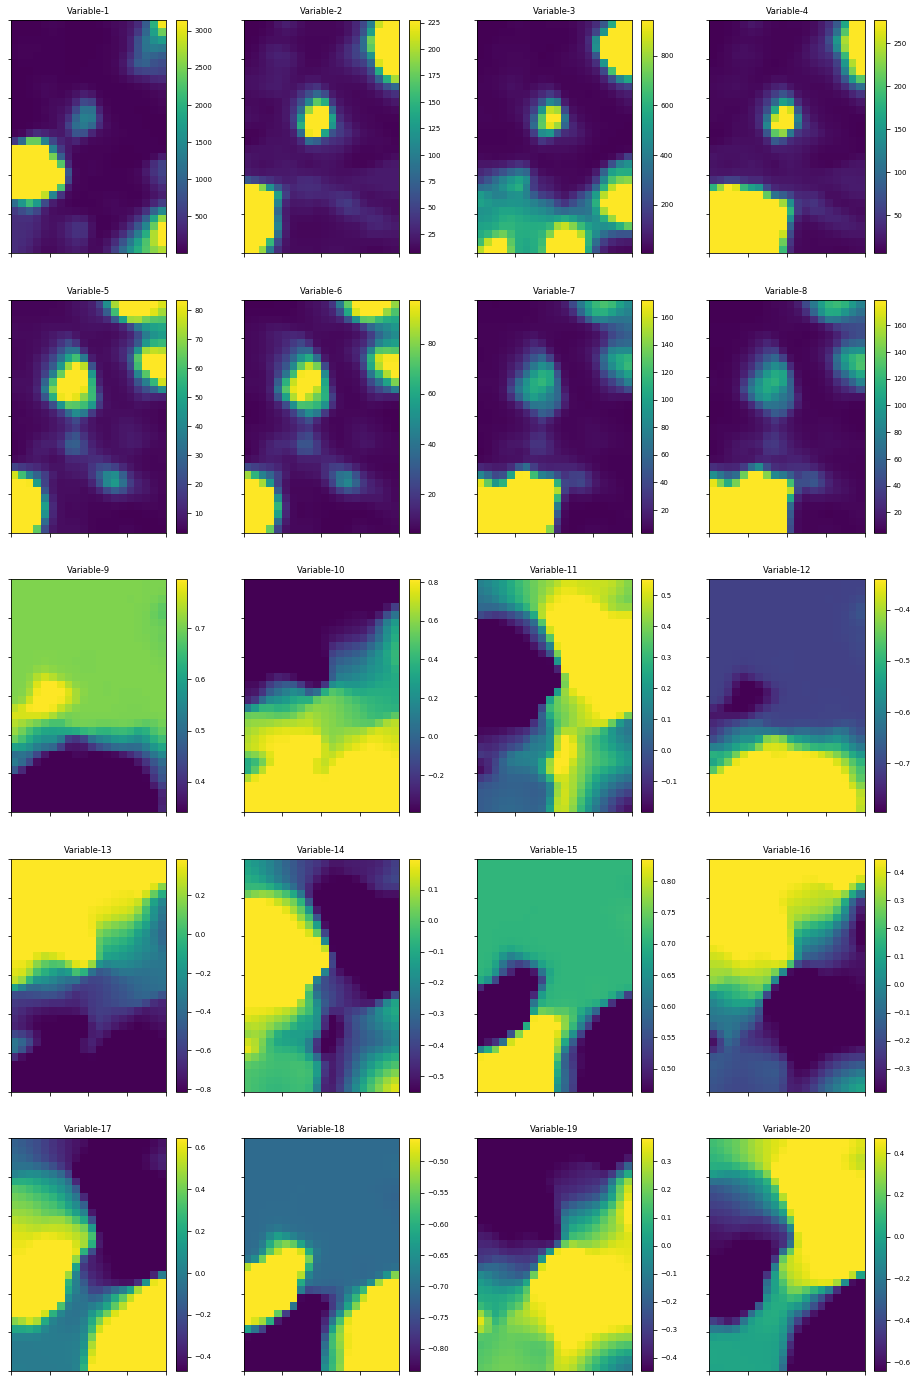

In [28]:
from sompy.visualization.mapview import View2D
view2D  = View2D(10,10,"", text_size=7)
view2D.show(som, col_sz=4, which_dim="all", cmap='jet', denormalize=True)
plt.show()

Showing selected components. Select components by specifying the index in 'which_dim=[...]' argument.

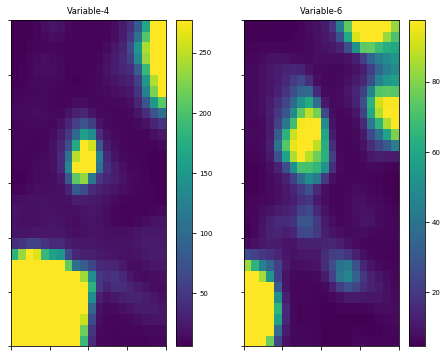

In [29]:
from sompy.visualization.mapview import View2D
view2D  = View2D(10,10,"", text_size=7)
view2D.show(som, col_sz=4, which_dim=[3,5], cmap='viridis', denormalize=True)
plt.show()

### Hits-map 

This visualization is very important because it shows how the instances/observations/rawd ata are spreaded across the SOM lattice. The more instances lay into a cell, the more instances it is representing and hence the more we have to take it into acount.

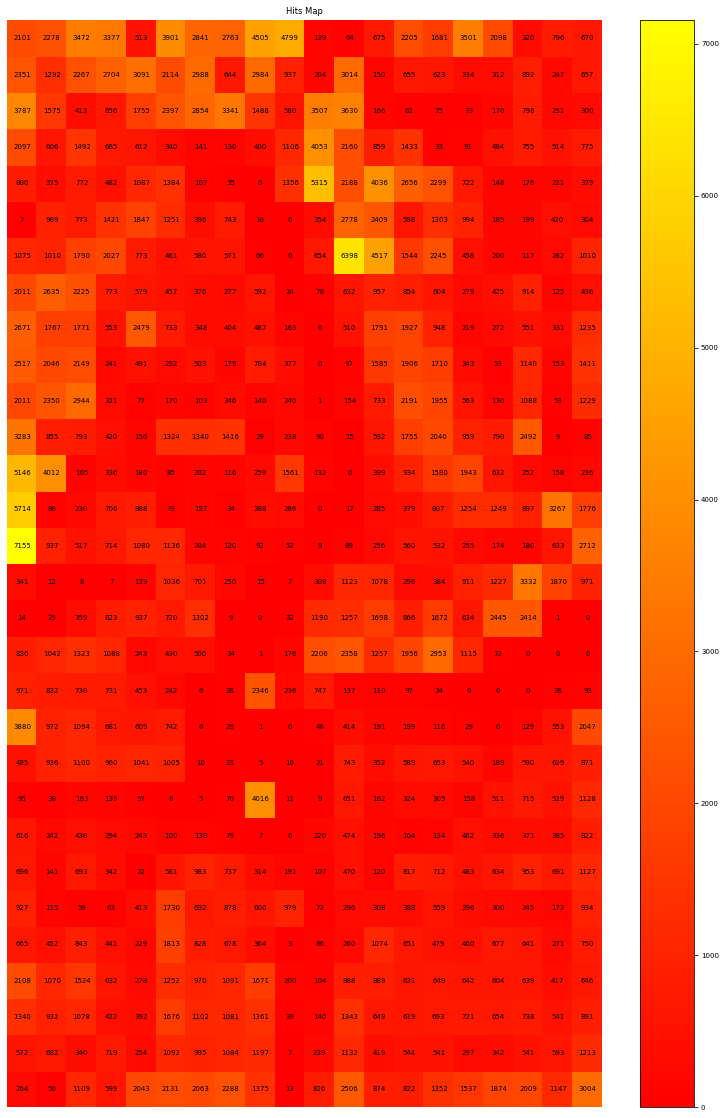

In [30]:
from sompy.visualization.bmuhits import BmuHitsView
#sm.codebook.lattice="rect"
vhts  = BmuHitsView(30,20,"Hits Map",text_size=7)
vhts.show(som, anotate=True, onlyzeros=False, labelsize=7, cmap="autumn", logaritmic=False)
plt.show()

### Clustering 

This visualization helps us to focus on the groups which share similar characteristics

/opt/anaconda3/lib/python3.7/site-packages/sompy/visualization/hitmap.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self._fig.add_subplot(111)


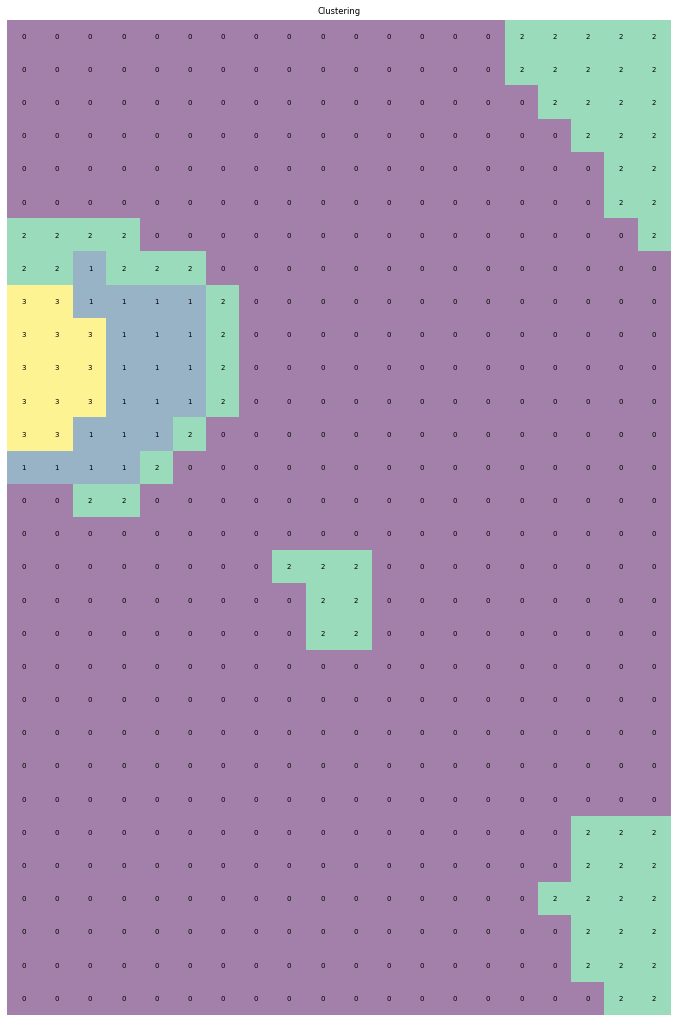

In [31]:
from sompy.visualization.hitmap import HitMapView
som.cluster(4)
map_labels=som.cluster(4)

hits  = HitMapView(30, 59,"Clustering",text_size=10, cmap=plt.cm.jet)
a=hits.show(som, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")
plt.show()

Render the U-matrix of the SOM:

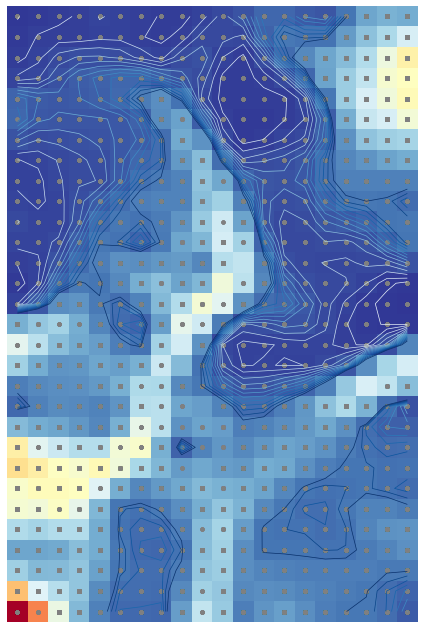

In [32]:
u = sompy.umatrix.UMatrixView(30, 59, 'umatrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som, distance=1, row_normalized=False)

#Here you have Umatrix plus its render
UMAT = u.show(som, distance2=1, row_normalized=False, show_data=True, contooor=True, blob=False)


Retrieveing the clustered data:

In [34]:
## Create a new dataframe of the Raw Data to add the BMU and Cluester to

MAVEN_data_SOM = MAVEN_SEP_data_timeSeries

## Retrieve the BMUs of each Raw Data

BMU=som._bmu[0]
MAVEN_data_SOM['BMU']=BMU
MAVEN_data_SOM.astype({'BMU': 'int64'}).dtypes

#MAVEN_data_SOM.dtypes

Unnamed: 0                              object
ION_ENERGY_FLUX__FOV_1_F               float64
ION_ENERGY_FLUX__FOV_1_F_QUAL          float64
ION_ENERGY_FLUX__FOV_1_R               float64
ION_ENERGY_FLUX__FOV_1_R_QUAL          float64
ION_ENERGY_FLUX__FOV_2_F               float64
ION_ENERGY_FLUX__FOV_2_F_QUAL          float64
ION_ENERGY_FLUX__FOV_2_R               float64
ION_ENERGY_FLUX__FOV_2_R_QUAL          float64
ELECTRON_ENERGY_FLUX___FOV_1_F         float64
ELECTRON_ENERGY_FLUX___FOV_1_F_QUAL    float64
ELECTRON_ENERGY_FLUX___FOV_1_R         float64
ELECTRON_ENERGY_FLUX___FOV_1_R_QUAL    float64
ELECTRON_ENERGY_FLUX___FOV_2_F         float64
ELECTRON_ENERGY_FLUX___FOV_2_F_QUAL    float64
ELECTRON_ENERGY_FLUX___FOV_2_R         float64
ELECTRON_ENERGY_FLUX___FOV_2_R_QUAL    float64
LOOK_DIRECTION_1_F_MSO_X               float64
LOOK_DIRECTION_1_F_MSO_Y               float64
LOOK_DIRECTION_1_F_MSO_Z               float64
LOOK_DIRECTION_1_R_MSO_X               float64
LOOK_DIRECTIO

In [35]:
MAVEN_data_SOM['Datetime']=pd.to_datetime(MAVEN_data_SOM['Unnamed: 0'])

In [36]:
MAVEN_data_SOM.dtypes

Unnamed: 0                                     object
ION_ENERGY_FLUX__FOV_1_F                      float64
ION_ENERGY_FLUX__FOV_1_F_QUAL                 float64
ION_ENERGY_FLUX__FOV_1_R                      float64
ION_ENERGY_FLUX__FOV_1_R_QUAL                 float64
ION_ENERGY_FLUX__FOV_2_F                      float64
ION_ENERGY_FLUX__FOV_2_F_QUAL                 float64
ION_ENERGY_FLUX__FOV_2_R                      float64
ION_ENERGY_FLUX__FOV_2_R_QUAL                 float64
ELECTRON_ENERGY_FLUX___FOV_1_F                float64
ELECTRON_ENERGY_FLUX___FOV_1_F_QUAL           float64
ELECTRON_ENERGY_FLUX___FOV_1_R                float64
ELECTRON_ENERGY_FLUX___FOV_1_R_QUAL           float64
ELECTRON_ENERGY_FLUX___FOV_2_F                float64
ELECTRON_ENERGY_FLUX___FOV_2_F_QUAL           float64
ELECTRON_ENERGY_FLUX___FOV_2_R                float64
ELECTRON_ENERGY_FLUX___FOV_2_R_QUAL           float64
LOOK_DIRECTION_1_F_MSO_X                      float64
LOOK_DIRECTION_1_F_MSO_Y    

In [37]:
## Creating a dictionary to relate Raw Data BMU to Cluster of the BMU:
keys_bmu = list(pd.Series(range(0,len(map_labels))))
values_clust =  list(map_labels)
bmu_clust = {keys_bmu[i]: values_clust[i] for i in range(len(keys_bmu))}
#print(len(keys_bmu))
#print(len(bmu_clust))
#print(len(values_clust))
#print(bmu_clust) #uncomment this to check the resulting dicitonary

Map the Cluster to the Raw Data using the BMU-Cluster dictionary above:

In [38]:
MAVEN_data_SOM['Cluster']=""
MAVEN_data_SOM['Cluster']=MAVEN_data_SOM['BMU'].map(bmu_clust)

MAVEN_data_SOM.head() #uncomment to check the resulting dataframe

,Unnamed: 0,ION_ENERGY_FLUX__FOV_1_F,ION_ENERGY_FLUX__FOV_1_F_QUAL,ION_ENERGY_FLUX__FOV_1_R,ION_ENERGY_FLUX__FOV_1_R_QUAL,ION_ENERGY_FLUX__FOV_2_F,ION_ENERGY_FLUX__FOV_2_F_QUAL,ION_ENERGY_FLUX__FOV_2_R,ION_ENERGY_FLUX__FOV_2_R_QUAL,ELECTRON_ENERGY_FLUX___FOV_1_F,...,LOOK_DIRECTION_1_R_MSO_Z,LOOK_DIRECTION_2_F_MSO_X,LOOK_DIRECTION_2_F_MSO_Y,LOOK_DIRECTION_2_F_MSO_Z,LOOK_DIRECTION_2_R_MSO_X,LOOK_DIRECTION_2_R_MSO_Y,LOOK_DIRECTION_2_R_MSO_Z,BMU,Datetime,Cluster
0,2018-05-15T00:00:32,11.10,5.41,3.48,5.41,12.70,5.52,3.94,5.52,3.47,...,-0.625,0.707,-0.332,-0.625,-0.707,0.332,0.625,278.0,2018-05-15 00:00:32,0
1,2018-05-15T00:00:40,9.48,5.31,5.55,5.31,10.20,5.36,6.47,5.36,4.63,...,-0.625,0.707,-0.332,-0.625,-0.707,0.332,0.625,278.0,2018-05-15 00:00:40,0
2,2018-05-15T00:00:48,5.80,5.06,5.56,5.06,7.42,5.17,6.03,5.17,5.32,...,-0.625,0.707,-0.332,-0.625,-0.707,0.332,0.625,278.0,2018-05-15 00:00:48,0
3,2018-05-15T00:00:56,5.78,5.06,5.78,5.06,6.71,5.12,6.71,5.12,6.02,...,-0.625,0.707,-0.332,-0.625,-0.707,0.332,0.625,278.0,2018-05-15 00:00:56,0
4,2018-05-15T00:01:04,5.10,5.01,6.25,5.01,8.79,5.26,7.64,5.26,3.02,...,-0.625,0.707,-0.332,-0.625,-0.707,0.332,0.625,278.0,2018-05-15 00:01:04,0


Also, check the concept of assigning 'clustering variables' before SOM training. The Air Flight data seems to have used 'clustering variables' before SOM training. Check this paper (already downloaded): https://ieeexplore.ieee.org/document/1199016

## Discussion of Results

Now that we have clustered the Raw Data based on the trained SOM, we can now look into each group of data and discuss the patterns in each.

Graphical rendering of the variables in each cluster helps in examining the trends.

### Subset the Raw Data according to Cluster

Use now the original time-series MAVEN data and add the BMU and Cluster data columns:

In [40]:
# create a new DataFrame from the MAVEN-timeSeries
# this dedicated daraframe has the time-date, BMU and Cluster
MAVEN_data_timeSeries_SOM=MAVEN_data_timeSeries
MAVEN_data_timeSeries_SOM['BMU']=""
MAVEN_data_timeSeries_SOM['Cluster']=""

# add the BMU data column
MAVEN_data_timeSeries_SOM['BMU']=BMU

# map the Cluster to each raw data
MAVEN_data_timeSeries_SOM['Cluster']=MAVEN_data_timeSeries_SOM['BMU'].map(bmu_clust)

Create a dataframe for each Cluster:

In [41]:

MAVEN_data_timeSeries_SOM=MAVEN_data_timeSeries_SOM.rename(columns={'Unnamed: 0':'Time1'})

MAVEN_data_timeSeries_SOM['Time1'] =  pd.to_datetime(MAVEN_data_timeSeries_SOM['Time1'])

In [42]:
Cluster_0 = MAVEN_data_timeSeries_SOM[MAVEN_data_timeSeries_SOM["Cluster"].isin([0])]
Cluster_1 = MAVEN_data_timeSeries_SOM[MAVEN_data_timeSeries_SOM["Cluster"].isin([1])]
Cluster_2 = MAVEN_data_timeSeries_SOM[MAVEN_data_timeSeries_SOM["Cluster"].isin([2])]
Cluster_3 = MAVEN_data_timeSeries_SOM[MAVEN_data_timeSeries_SOM["Cluster"].isin([3])]

# check the length(no. of observations) of each cluster:
print("Cluster 0 No. Obs.: " + str(len(Cluster_0)))
print("Cluster 1 No. Obs.: " + str(len(Cluster_1)))
print("Cluster 2 No. Obs.: " + str(len(Cluster_2)))
print("Cluster 3 No. Obs.: " + str(len(Cluster_3)))

Cluster 0 No. Obs.: 466042
Cluster 1 No. Obs.: 11142
Cluster 2 No. Obs.: 36646
Cluster 3 No. Obs.: 13005


In [43]:
# make sure subsetting is corretcly done; check the 'Cluster' column data/last column
Cluster_2

,Time1,ION_ENERGY_FLUX__FOV_1_F,ION_ENERGY_FLUX__FOV_1_F_QUAL,ION_ENERGY_FLUX__FOV_1_R,ION_ENERGY_FLUX__FOV_1_R_QUAL,ION_ENERGY_FLUX__FOV_2_F,ION_ENERGY_FLUX__FOV_2_F_QUAL,ION_ENERGY_FLUX__FOV_2_R,ION_ENERGY_FLUX__FOV_2_R_QUAL,ELECTRON_ENERGY_FLUX___FOV_1_F,...,LOOK_DIRECTION_1_R_MSO_Z,LOOK_DIRECTION_2_F_MSO_X,LOOK_DIRECTION_2_F_MSO_Y,LOOK_DIRECTION_2_F_MSO_Z,LOOK_DIRECTION_2_R_MSO_X,LOOK_DIRECTION_2_R_MSO_Y,LOOK_DIRECTION_2_R_MSO_Z,BMU,Datetime,Cluster
1550,2018-05-15 03:27:12,42.8,7.16,9.71,7.16,94.50,9.34,820.0,9.34,3.010,...,0.642,0.707,-0.296,0.642,-0.707,0.296,-0.642,444.0,2018-05-15 03:27:12,2
1551,2018-05-15 03:27:20,39.1,6.98,13.40,6.98,74.40,8.54,922.0,8.54,2.540,...,0.637,0.707,-0.307,0.637,-0.707,0.307,-0.637,463.0,2018-05-15 03:27:20,2
1552,2018-05-15 03:27:28,58.2,7.85,16.00,7.85,78.50,8.72,970.0,8.72,1.620,...,0.631,0.707,-0.318,0.631,-0.707,0.318,-0.631,463.0,2018-05-15 03:27:28,2
1553,2018-05-15 03:27:36,65.0,8.17,12.70,8.17,52.60,7.56,1070.0,7.56,0.924,...,0.625,0.707,-0.329,0.625,-0.707,0.329,-0.625,463.0,2018-05-15 03:27:36,2
1554,2018-05-15 03:27:44,76.9,8.65,10.20,8.65,23.60,6.14,1150.0,6.14,3.950,...,0.619,0.707,-0.341,0.619,-0.707,0.341,-0.619,463.0,2018-05-15 03:27:44,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525502,2018-06-28 21:17:20,3050.0,92.40,12.60,92.40,7.83,10.40,17.9,10.40,18.400,...,0.312,0.338,0.014,0.941,-0.338,-0.014,-0.941,345.0,2018-06-28 21:17:20,2
525503,2018-06-28 21:17:24,3280.0,95.90,21.20,95.90,2.78,9.70,18.2,9.70,3.280,...,0.310,0.337,0.012,0.941,-0.337,-0.012,-0.941,324.0,2018-06-28 21:17:24,2
525504,2018-06-28 21:17:28,3330.0,96.70,13.40,96.70,4.29,9.91,12.6,9.91,9.600,...,0.308,0.337,0.009,0.942,-0.337,-0.009,-0.942,324.0,2018-06-28 21:17:28,2
525505,2018-06-28 21:17:32,3390.0,97.50,11.60,97.50,11.40,10.80,12.1,10.80,1.520,...,0.306,0.336,0.007,0.942,-0.336,-0.007,-0.942,324.0,2018-06-28 21:17:32,2


Now that the observations are grouped based on SOM clusters:
- use descriptive stats tools such as histogram, x-y scatter, etc.
- use PyDivide visual analysis tools together with the 'date-time' information from the SOM clusters to find explanations for grouping of observations.

### Using the variable 'ION_ENERGY_FLUX__FOV_1_F':

- the U-matix shows that the region of distinct values are close to the Cluster 3 region
- based on the U-matrix and the cluster plots of the SOM, the variable that is intense at Cluster 3 is variable "Electron eflux  Parallel (100-500 ev) Quality"
- So,let us examine the variabale "Electron eflux  Parallel (100-500 ev) Quality"
- The histogram plots are not easy to distingush from this graph. Try separating the plots at the same x-axis range.

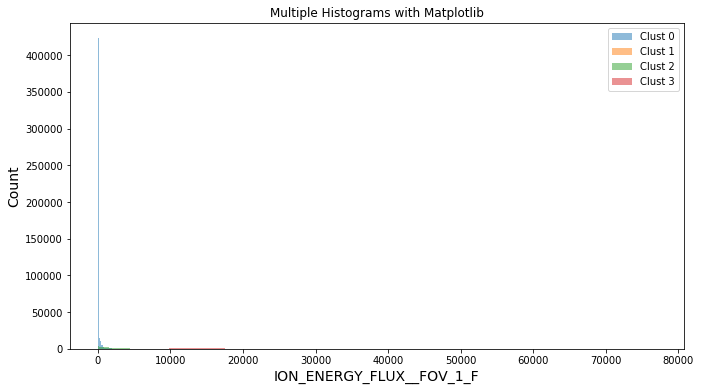

In [44]:
plt.figure(figsize=(11,6))
plt.hist(Cluster_0['ION_ENERGY_FLUX__FOV_1_F'], bins=100, alpha=0.5, label="Clust 0")
plt.hist(Cluster_1['ION_ENERGY_FLUX__FOV_1_F'], bins=100, alpha=0.5, label="Clust 1")
plt.hist(Cluster_2['ION_ENERGY_FLUX__FOV_1_F'], bins=100, alpha=0.5, label="Clust 2")
plt.hist(Cluster_3['ION_ENERGY_FLUX__FOV_1_F'], bins=100, alpha=0.5, label="Clust 3")

plt.xlabel('ION_ENERGY_FLUX__FOV_1_F', size=14)
plt.ylabel("Count", size=14)
plt.title("Multiple Histograms with Matplotlib")
plt.legend(loc='upper right')
plt.savefig("overlapping_histograms_with_matplotlib_Python_SEP_ION_ENERGY_FLUX__FOV_1_F.png")


- Separating the histograms:

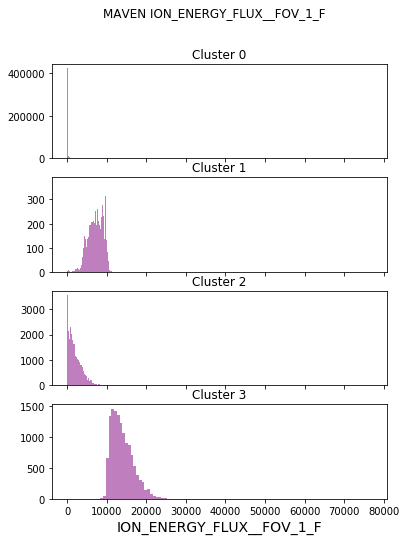

In [46]:
fig1, axs = plt.subplots(4, sharex=True, sharey=False, figsize=(6,8))
fig1.suptitle('MAVEN ION_ENERGY_FLUX__FOV_1_F')
axs[0].hist(Cluster_0['ION_ENERGY_FLUX__FOV_1_F'], bins=100, alpha=0.5, color='purple', label="Clust 0")
axs[0].set_title('Cluster 0')
axs[1].hist(Cluster_1['ION_ENERGY_FLUX__FOV_1_F'], bins=100, alpha=0.5, color='purple', label="Clust 1")
axs[1].set_title('Cluster 1')
axs[2].hist(Cluster_2['ION_ENERGY_FLUX__FOV_1_F'], bins=100, alpha=0.5, color='purple', label="Clust 2")
axs[2].set_title('Cluster 2')
axs[3].hist(Cluster_3['ION_ENERGY_FLUX__FOV_1_F'], bins=100, alpha=0.5, color='purple', label="Clust 3")
axs[3].set_title('Cluster 3')

plt.xlabel('ION_ENERGY_FLUX__FOV_1_F', size=14)

fig1.savefig("figrue_separated_plots - SEP_ION_ENERGY_FLUX__FOV_1_F.png")

### Using the variable 'ION_ENERGY_FLUX__FOV_1_R':

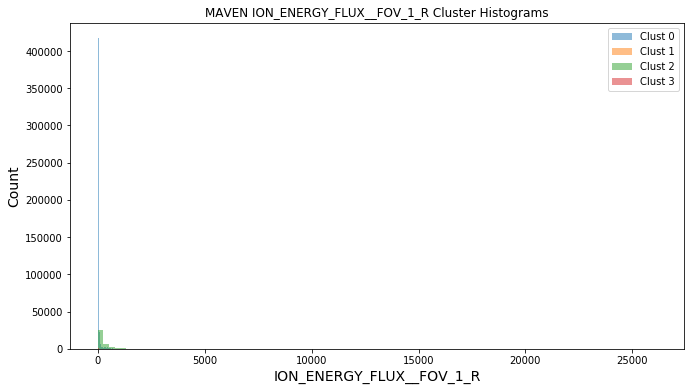

In [47]:
plt.figure(figsize=(11,6))

plt.hist(Cluster_0['ION_ENERGY_FLUX__FOV_1_R'], bins=100, alpha=0.5, label="Clust 0")
plt.hist(Cluster_1['ION_ENERGY_FLUX__FOV_1_R'], bins=100, alpha=0.5, label="Clust 1")
plt.hist(Cluster_2['ION_ENERGY_FLUX__FOV_1_R'], bins=100, alpha=0.5, label="Clust 2")
plt.hist(Cluster_3['ION_ENERGY_FLUX__FOV_1_R'], bins=100, alpha=0.5, label="Clust 3")

plt.xlabel("ION_ENERGY_FLUX__FOV_1_R", size=14)
plt.ylabel("Count", size=14)
plt.title("MAVEN ION_ENERGY_FLUX__FOV_1_R Cluster Histograms")
plt.legend(loc='upper right')
plt.savefig("overlapping_histograms_with_matplotlib_Python_SEP_ION_ENERGY_FLUX__FOV_1_R.png")


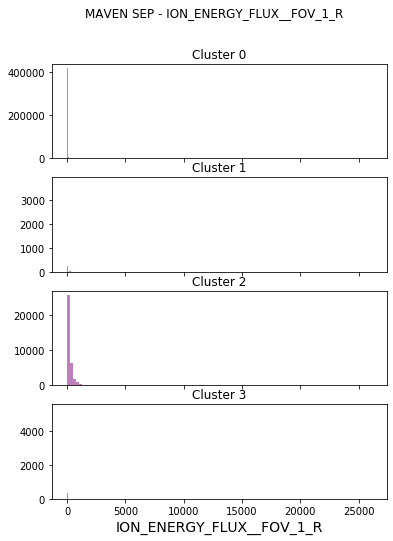

In [48]:
fig1, axs = plt.subplots(4, sharex=True, sharey=False, figsize=(6,8))
fig1.suptitle('MAVEN SEP - ION_ENERGY_FLUX__FOV_1_R')
axs[0].hist(Cluster_0['ION_ENERGY_FLUX__FOV_1_R'], bins=100, alpha=0.5, color='purple', label="Clust 0")
axs[0].set_title('Cluster 0')
axs[1].hist(Cluster_1['ION_ENERGY_FLUX__FOV_1_R'], bins=100, alpha=0.5, color='purple', label="Clust 1")
axs[1].set_title('Cluster 1')
axs[2].hist(Cluster_2['ION_ENERGY_FLUX__FOV_1_R'], bins=100, alpha=0.5, color='purple', label="Clust 2")
axs[2].set_title('Cluster 2')
axs[3].hist(Cluster_3['ION_ENERGY_FLUX__FOV_1_R'], bins=100, alpha=0.5, color='purple', label="Clust 3")
axs[3].set_title('Cluster 3')

plt.xlabel('ION_ENERGY_FLUX__FOV_1_R', size=14)

fig1.savefig("figrue_separated_plots - SEP - ION_ENERGY_FLUX__FOV_1_R.png")

### Using the variable 'ELECTRON_ENERGY_FLUX___FOV_1_F':

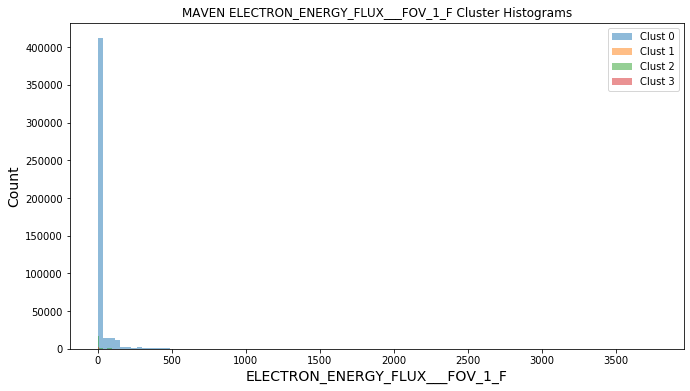

In [49]:
plt.figure(figsize=(11,6))

plt.hist(Cluster_0['ELECTRON_ENERGY_FLUX___FOV_1_F'], bins=100, alpha=0.5, label="Clust 0")
plt.hist(Cluster_1['ELECTRON_ENERGY_FLUX___FOV_1_F'], bins=100, alpha=0.5, label="Clust 1")
plt.hist(Cluster_2['ELECTRON_ENERGY_FLUX___FOV_1_F'], bins=100, alpha=0.5, label="Clust 2")
plt.hist(Cluster_3['ELECTRON_ENERGY_FLUX___FOV_1_F'], bins=100, alpha=0.5, label="Clust 3")

plt.xlabel('ELECTRON_ENERGY_FLUX___FOV_1_F', size=14)
plt.ylabel("Count", size=14)
plt.title("MAVEN ELECTRON_ENERGY_FLUX___FOV_1_F Cluster Histograms")
plt.legend(loc='upper right')
plt.savefig("overlapping_histograms_with_matplotlib_Python_SEP_ELECTRON_ENERGY_FLUX___FOV_1_F.png")


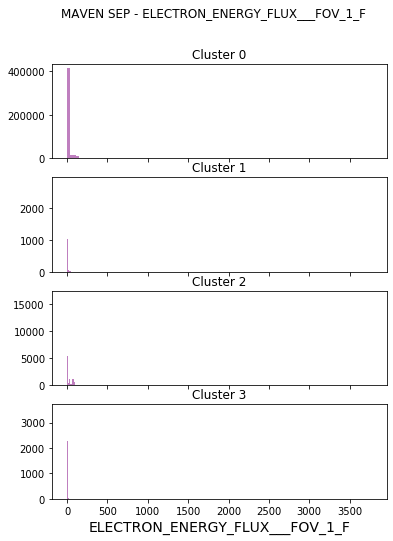

In [50]:
fig1, axs = plt.subplots(4, sharex=True, sharey=False, figsize=(6,8))
fig1.suptitle('MAVEN SEP - ELECTRON_ENERGY_FLUX___FOV_1_F')
axs[0].hist(Cluster_0['ELECTRON_ENERGY_FLUX___FOV_1_F'], bins=100, alpha=0.5, color='purple', label="Clust 0")
axs[0].set_title('Cluster 0')
axs[1].hist(Cluster_1['ELECTRON_ENERGY_FLUX___FOV_1_F'], bins=100, alpha=0.5, color='purple', label="Clust 1")
axs[1].set_title('Cluster 1')
axs[2].hist(Cluster_2['ELECTRON_ENERGY_FLUX___FOV_1_F'], bins=100, alpha=0.5, color='purple', label="Clust 2")
axs[2].set_title('Cluster 2')
axs[3].hist(Cluster_3['ELECTRON_ENERGY_FLUX___FOV_1_F'], bins=100, alpha=0.5, color='purple', label="Clust 3")
axs[3].set_title('Cluster 3')

plt.xlabel('ELECTRON_ENERGY_FLUX___FOV_1_F', size=14)

fig1.savefig("figrue_separated_plots - SEP - ELECTRON_ENERGY_FLUX___FOV_1_F.png")

## References
This notebook has been created using the templates from:

https://gist.github.com/sevamoo/035c56e7428318dd3065013625f12a11

http://www.vahidmoosavi.com

SOM Package: https://github.com/sevamoo/sompy

Pandas: https://pandas.pydata.org/